**Final Project – Digital Skill Fair 38.0 (Data Science)**

***By: Asip Kasipul Kurob***

Dalam proyek ini, saya akan menganalisis dataset penumpang Titanic untuk mengungkap pola-pola yang mempengaruhi peluang seseorang untuk selamat. Analisis ini akan meliputi langkah-langkah berikut:
1. **Cek data secara keseluruhan** dengan menggunakan metode head, tail, sample, dan info, kemudian lakukan observasi untuk memperoleh wawasan awal tentang data.

2. **Lakukan rangkuman statistik** dengan mengekstrak informasi yang didapat dari observasi sebelumnya, seperti distribusi data dan nilai rata-rata.

3. **Periksa apakah ada duplikat** dalam dataset, dan tentukan bagaimana cara menanganinya jika ditemukan.

4. **Periksa apakah ada missing values**, hitung persentase jika ada, dan tentukan bagaimana cara menangani nilai yang hilang tersebut.

## Import Libraries

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

**Library** adalah kumpulan kode siap pakai yang berisi fungsi dan alat bantu untuk memudahkan kita dalam mengolah data, membuat visualisasi, atau melakukan analisis statistik. Berikut beberapa library yang digunakan:

`NumPy`:  Library untuk operasi numerik pada array dan matriks.

`Pandas`:  Library yang digunakan untuk manipulasi dan analisis data dengan struktur DataFrame dan Series.

`Seaborn`: Library visualisasi statistik yang dibangun di atas matplotlib, tampilannya lebih rapi dan informatif.

`matplotlib.pyplot`: Modul untuk membuat berbagai jenis grafik dan diagram.

`pd.set_option()`: Digunakan untuk mengatur tampilan output DataFrame, seperti menampilkan semua kolom dan baris.

In [53]:
# import data
df = pd.read_excel('titanic.xlsx')
data = df.copy()
# Melihat 5 data teratas
data.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [ ]:
# Melihat 5 data terbawah
data.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [ ]:
# Melihat 5 data secara acak
data.sample(5)

,survived,name,sex,age
314,1,"Widener, Mrs. George Dunton (Eleanor Elkins)",female,50.0
416,1,"Garside, Miss. Ethel",female,34.0
382,0,"Corbett, Mrs. Walter H (Irene Colvin)",female,30.0
121,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN
79,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0


**Observasi:**
1. Kolom survived dan age berupa numerik sedangkan pada kolom name dan sex berupa kategorical
2. Kolom sex tampaknya hanya memiliki dua nilai berbeda(laki-laki atau perempuan)
3. Kolom survived juga bersifat biner(0,1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


**Observasi**
*   Dataset terdiri dari **500 baris** dan **4 kolom**
*   2 kolom **kategorikal**: `name` dan `sex` (tipe data: object)
*   2 kolom **numerik**: `survived` (int64) dan `age` (float64)
*   Kolom age memiliki **49 nilai yang hilang**, karena hanya terdapat **451 nilai non-null** dari total **500 baris data**

## 1. Statistical Summary

In [ ]:
# Melihat nama-nama kolom pada data
data.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [ ]:
# Mengelompokan kolom berdasarkan type datanya
categoricals = ['name', 'sex']

numericals = ['survived', 'age']

In [54]:
# Melihat ringkasan statistik untuk kolom numerik
data[numericals].describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


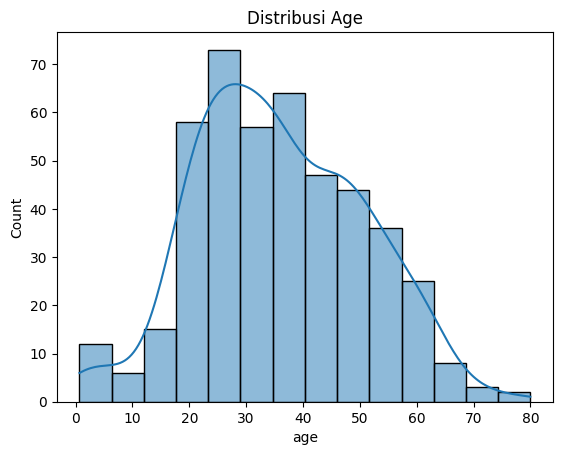

In [ ]:
sns.histplot(data['age'], kde=True)
plt.title('Distribusi Age')
plt.show()

**Observasi:**

Berdasarkan visualisasi, distribusi data usia tidak mengikuti distribusi normal, melainkan menunjukkan pola right-skewed (kemiringan positif), dengan ciri-ciri sebagai berikut:
1. Puncak distribusi (modus) berada pada usia sekitar 25–30 tahun.
2. Ekor distribusi memanjang ke arah kanan, yaitu pada usia yang lebih tinggi — menandakan bahwa jumlah data pada kelompok usia tua lebih sedikit.
3. Distribusi tidak simetris, melainkan miring ke kanan, yang merupakan ciri khas distribusi dengan skewness positif.

Dengan distribusi seperti ini, median merupakan metode imputasi yang lebih tepat dibandingkan mean, karena lebih tahan terhadap pengaruh outlier.

In [55]:
# Melihat ringkasan statistik untuk kolom kategorikal
data[categoricals].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


***Observasi***

* Kolom `sex` memiliki 2 nilai unik: `male` dan `female`.
* Dari total 500 entri:
Kategori yang paling sering muncul adalah` male`, dengan 288 entri.
Ini menunjukkan bahwa dalam dataset adalah laki-laki lebih banyak daripada perempuan.
* Kolom `name` memiliki 499 nilai unik dari 500 data, yang mengindikasikan kemungkinan adanya data duplikat.

## Pembersihan Data

### 1. Handling Duplikat

In [ ]:
len(data)

500

In [ ]:
len(data.drop_duplicates())

499

In [ ]:
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat
len(data.drop_duplicates()) / len(data)

0.998

In [ ]:
# Ambil baris duplikat (termasuk yang asli)
duplicates = data[data.duplicated(keep=False)]
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [ ]:
#Handling Drop duplicate
data = data.drop_duplicates()

In [ ]:
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat
len(data.drop_duplicates()) / len(data)

1.0

Hasil yang diperoleh adalah 1.0, yang menunjukkan bahwa tidak ada data duplikat yang tersisa setelah proses pembersihan. Dengan demikian, dapat disimpulkan bahwa penanganan data duplikat telah berhasil dilakukan.

## 2. Handling Missing Value

In [ ]:
data.isna().sum()

,0
survived,0
name,0
sex,0
age,49


In [ ]:
data.isnull().sum()

,0
survived,0
name,0
sex,0
age,49


In [ ]:
# percentage version
total_rows = len(data)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in data.columns:
    missing_count = data[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'survived' Has 0 missing values (0.00%)
Column 'name' Has 0 missing values (0.00%)
Column 'sex' Has 0 missing values (0.00%)
Column 'age' Has 49 missing values (9.82%)


Dataset ini mengandung nilai yang hilang hanya pada kolom age, dengan 49 nilai yang hilang (9.82%). Karena tingkat missing value < 20%, maka penanganannya dilakukan sebagai berikut:

1.   Cek terlebih dahulu jenis distribusi data untuk menentukan metode imputasi yang tepat:
*   Jika distribusi data normal, imputasi dapat dilakukan menggunakan mean.
*   Jika distribusi data skewed atau ada outliers, imputasi lebih baik menggunakan median.
*   Jika terdapat banyak nilai yang terulang dalam data numerik, modus bisa dipertimbangkan.
2.   Kolom age (numerik) → Imputasi bisa menggunakan nilai mean,median atau modus
3.   Kolom sex dan survived (kategorikal) → Tidak ada missing values, jadi tidak perlu imputasi

In [ ]:
# Imputasi hanya untuk kolom numerik dengan median
for column in data.columns:
    if data[column].dtype != 'object':
        data[column] = data[column].fillna(data[column].median())

# Cek jumlah missing value setelah diimputasi
print("\nJumlah missing value setelah imputasi:")
print(data.isnull().sum())


Jumlah missing value setelah imputasi:
survived    0
name        0
sex         0
age         0
dtype: int64


Penanganan nilai yang hilang (missing value) dilakukan dengan metode imputasi menggunakan median, karena kolom yang memiliki missing value (age) bertipe numerik dan memiliki distribusi yang tidak normal (right-skewed)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


Proses penanganan missing value telah berhasil diselesaikan dan dataset siap digunakan untuk proses analisis selanjutnya.

## 3. Visualisasi Data

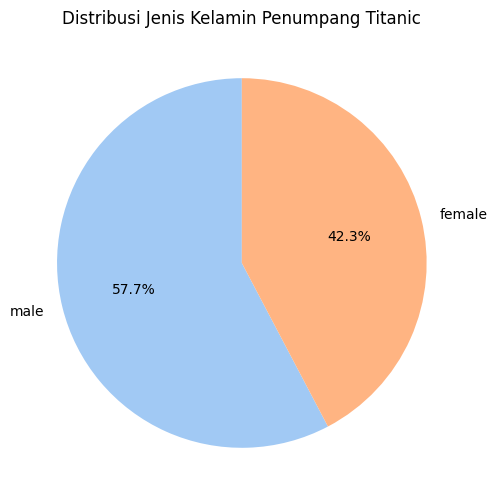

In [ ]:
# Hitung jumlah penumpang berdasarkan jenis kelamin
sex_counts = data['sex'].value_counts()

# Ambil palet warna pastel dari seaborn sebanyak jumlah kategori
colors = sns.color_palette('pastel')[:len(sex_counts)]

# Buat pie chart
plt.figure(figsize=(6, 6))
sex_counts.plot.pie(
    autopct='%1.1f%%',    # Menampilkan persentase
    colors=colors,        # Warna otomatis dari seaborn
    startangle=90         # Mulai dari posisi jam 12
)
plt.title('Distribusi Jenis Kelamin Penumpang Titanic')
plt.ylabel('')  # Menghapus label Y agar tampil lebih bersih
plt.show()

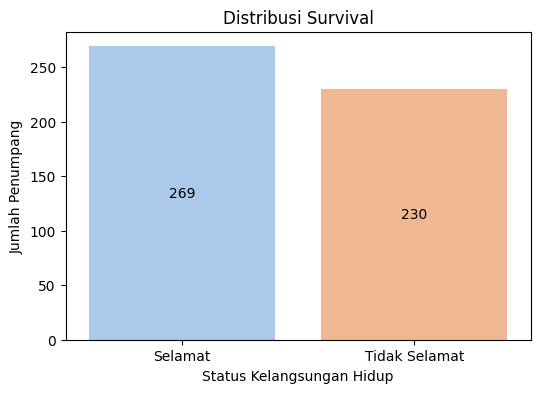

In [ ]:
# Histogram untuk distribusi survival
plt.figure(figsize=(6, 4))  # Mengatur ukuran grafik

# Ganti label survived dari 0/1 menjadi teks
data['survived_label'] = data['survived'].map({0: 'Tidak Selamat', 1: 'Selamat'})

# Membuat grafik batang jumlah penumpang yang selamat dan tidak selamat
ax = sns.countplot(
    x='survived_label',           # Menggunakan kolom 'survived_label' sebagai sumbu X
    hue='survived_label',         # Mewarnai batang berdasarkan nilai 'survived_label'
    data=data,                    # Mengambil data dari DataFrame data
    palette='pastel',             # Menggunakan warna pastel
    legend=False                  # Tidak menampilkan legenda
)

# Menambahkan jumlah (count) di dalam setiap batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height / 2),  # Posisi di tengah vertikal batang
                ha='center', va='center', fontsize=10, color='black')

# Menambahkan judul dan label sumbu
plt.title('Distribusi Survival')
plt.xlabel('Status Kelangsungan Hidup')
plt.ylabel('Jumlah Penumpang')
plt.show()  # Menampilkan grafik